# Image Datasets for Practicing Machine Learning in OpenCV

At the very start of your machine learning journey, publicly available datasets alleviate the worry of creating the datasets yourself and let you focus on learning to use the machine learning algorithms. It also helps if the datasets are moderately sized and do not require too much pre-processing to get you to practice using the algorithms quicker before moving on to more challenging problems. 

Two datasets we will be looking at are the simpler digits dataset provided with OpenCV and the more challenging but widely used CIFAR-10 dataset. We will use any of these two datasets during our journey through OpenCV’s machine learning algorithms. 

In this tutorial, you will learn how to download and extract the OpenCV digits and CIFAR-10 datasets for practicing machine learning in OpenCV. 

After completing this tutorial, you will know:

- How to download and extract the OpenCV digits dataset. 
- How to download and extract the CIFAR-10 dataset without necessarily relying on other Python packages (such as TensorFlow).

## Tutorial Overview

This tutorial is divided into three parts; they are:

- The Digits Dataset
- The CIFAR-10 Dataset
- Loading the Datasets

## The Digits Dataset

[OpenCV provides the image, digits.png](https://github.com/opencv/opencv/tree/master/samples/data), composed of a ‘collage’ of 20
20 pixel sub-images, where each sub-image features a digit from 0 to 9 and may be split up to create a dataset. In total, the *digits* image contains 5,000 handwritten digits. 

The digits dataset provided by OpenCV does not necessarily represent the real-life challenges that come with more complex datasets, primarily because its image content features very limited variation. However, its simplicity and ease of use will allow us to quickly test several machine learning algorithms at a low pre-processing and computational cost. 

To be able to extract the dataset from the full digits image, our first step is to split it into the many sub-images that make it up. For this purpose, let’s create the following <code>split_images</code> function:

In [1]:
from cv2 import imread, IMREAD_GRAYSCALE
from numpy import hsplit, vsplit, array

def split_images(img_name, img_size):

    # Load the full image from the specified file
    img = imread(img_name, IMREAD_GRAYSCALE)

    # Find the number of sub-images on each row and column according to their size
    num_rows = img.shape[0] / img_size
    num_cols = img.shape[1] / img_size

    # Split the full image horizontally and vertically into sub-images
    sub_imgs = [hsplit(row, num_cols) for row in vsplit(img, num_rows)]

    return img, array(sub_imgs)

The <code>split_images</code> function takes as input the path to the full image, together with the pixel size of the sub-images. Since we are working with square sub-images, we shall be denoting their size by a single dimension, which is equal to 20. 

The function subsequently applies the OpenCV <code>imread</code> method to load a grayscale version of the image into a NumPy array. The <code>hsplit</code> and <code>vsplit</code> methods are then used to split the NumPy array horizontally and vertically, respectively. 

The array of sub-images the <code>split_images</code> function returns is of size (50, 100, 20, 20).

Once we have extracted the array of sub-images, we shall partition it into training and testing sets. We will also need to create the ground truth labels for both splits of data to be used during the training process and to evaluate the test results. 

The following  <code>split_data</code> function serves these purposes:

In [2]:
from numpy import float32, arange, repeat, newaxis

def split_data(img_size, sub_imgs, ratio):

    # Compute the partition between the training and testing data
    partition = int(sub_imgs.shape[1] * ratio)

    # Split dataset into training and testing sets
    train = sub_imgs[:, :partition, :, :]
    test = sub_imgs[:, partition:sub_imgs.shape[1], :, :]

    # Flatten each image into a one-dimensional vector
    train_imgs = train.reshape(-1, img_size ** 2)
    test_imgs = test.reshape(-1, img_size ** 2)

    # Create the ground truth labels
    labels = arange(10)
    train_labels = repeat(labels, train_imgs.shape[0] / labels.shape[0])[:, newaxis]
    test_labels = repeat(labels, test_imgs.shape[0] / labels.shape[0])[:, newaxis]

    return train_imgs, train_labels, test_imgs, test_labels

The <code>split_data</code> function takes the array of sub-images as input and the split ratio for the training portion of the dataset. The function then proceeds to compute the <code>partition</code> value that divides the array of sub-images along its columns into training and testing sets. This <code>partition</code> value is then used to allocate the first set of columns to the training data and the remaining set of columns to the testing data. 

To visualize this partitioning on the digits.png image, this would appear as follows:

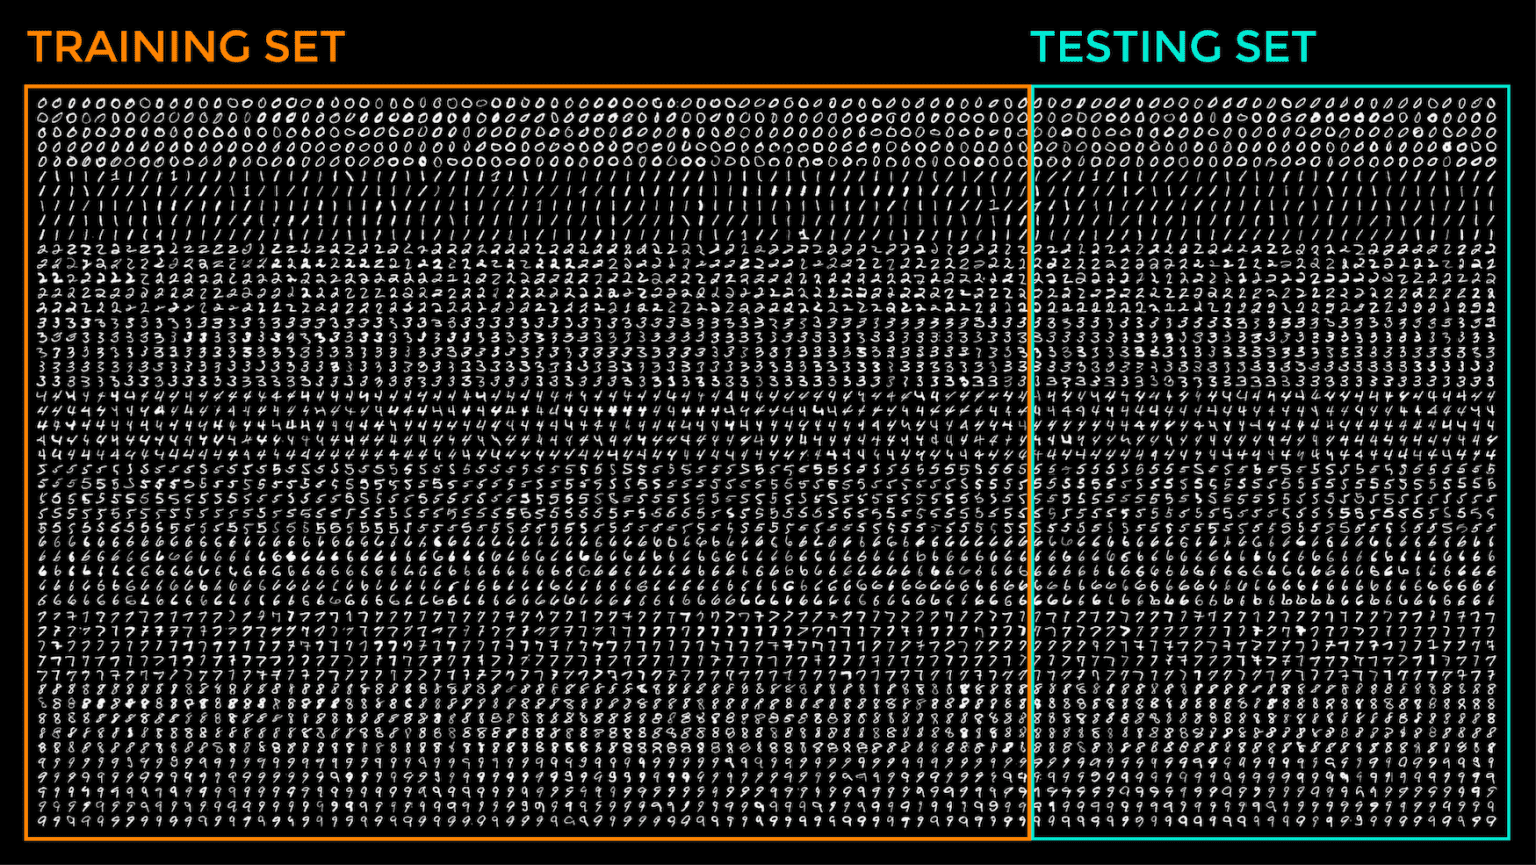

You may also note that we are flattening out every $20X20$ sub-image into a one-dimensional vector of length 400 pixels such that, in the arrays containing the training and testing images, every row now stores a flattened out version of a $20/times20$ pixel image.

The final part of the <code>split_data</code> function creates ground truth labels with values between 0 and 9 and repeats these values according to how many training and testing images we have available. 

## The CIFAR-10 Dataset

The CIFAR-10 dataset is not provided with OpenCV, but we shall consider it because it represents real-world challenges better than OpenCV’s digits dataset. 

The CIFAR-10 dataset consists of a total of 60,000, 32X32 RGB images. It features a variety of images belonging to 10 different classes, such as airplanes, cats, and ships. The dataset files are readily split into 5 pickle files containing 1,000 training images and labels, plus an additional one with 1,000 testing images and labels. 

Let’s go ahead and download the CIFAR-10 dataset for Python from [this link](https://www.cs.toronto.edu/~kriz/cifar.html) (**note**: the reason for not using TensorFlow/Keras to do so is to show how we can work without relying on additional Python packages if need be). Take note of the path on your hard disk to which you have saved and extracted the dataset. 

The following code loads the dataset files and returns the training and testing, images, and labels:

In [3]:
from pickle import load
from numpy import array, newaxis


def load_images(path):

    # Create empty lists to store the images and labels
    imgs = []
    labels = []

    # Iterate over the dataset's files
    for batch in range(5):

        # Specify the path to the training data
        train_path_batch = path + 'data_batch_' + str(batch + 1)

        # Extract the training images and labels from the dataset files
        train_imgs_batch, train_labels_batch = extract_data(train_path_batch)

        # Store the training images
        imgs.append(train_imgs_batch)
        train_imgs = array(imgs).reshape(-1, 3072)

        # Store the training labels
        labels.append(train_labels_batch)
        train_labels = array(labels).reshape(-1, 1)

    # Specify the path to the testing data
    test_path_batch = path + 'test_batch'

    # Extract the testing images and labels from the dataset files
    test_imgs, test_labels = extract_data(test_path_batch)
    test_labels = array(test_labels)[:, newaxis]

    return train_imgs, train_labels, test_imgs, test_labels


def extract_data(path):

    # Open pickle file and return a dictionary
    with open(path, 'rb') as fo:
        dict = load(fo, encoding='bytes')

    # Extract the dictionary values
    dict_values = list(dict.values())

    # Extract the images and labels
    imgs = dict_values[2]
    labels = dict_values[1]

    return imgs, labels

It is important to remember that the compromise of testing out different models using a larger and more varied dataset, such as the CIFAR-10, over a simpler one, such as the digits dataset, is that training on the former might be more time-consuming. 

## Loading the Datasets

Let’s try calling the functions that we have created above. 

I have separated the code belonging to the digits dataset from the code belonging to the CIFAR-10 dataset into two different Python scripts that I named <code>digits_dataset.py</code> and <code>cifar_dataset.py</code>, respectively:

In [ ]:
from digits_dataset import split_images, split_data
from cifar_dataset import load_images

# Load the digits image
img, sub_imgs = split_images('Images/digits.png', 20)

# Obtain training and testing datasets from the digits image
digits_train_imgs, digits_train_labels, digits_test_imgs, digits_test_labels = split_data(20, sub_imgs, 0.8)

# Obtain training and testing datasets from the CIFAR-10 dataset
cifar_train_imgs, cifar_train_labels, cifar_test_imgs, cifar_test_labels = load_images('Images/cifar-10-batches-py/')

**Note**: Do not forget to change the paths in the code above to where you have saved *your* data files. 

In the subsequent tutorials, we shall see how to use these datasets with different machine learning techniques, first seeing how to convert the dataset images into feature vectors as one of the pre-processing steps before using them for machine learning.  

## Summary

In this tutorial, you learned how to download and extract the OpenCV digits and CIFAR-10 datasets for practicing machine learning in OpenCV.

Specifically, you learned:

- How to download and extract the OpenCV digits dataset. 
- How to download and extract the CIFAR-10 dataset without necessarily relying on other Python packages (such as TensorFlow).